In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.constants import c,h,a0, e, m_e
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
from scipy.integrate import solve_ivp
from scipy import fft

Question 1.e


In [4]:
#define constants and units from astropy
e_c= e.esu
b= 10*u.G
m= m_e.to(u.g)
c_l=c.to(u.cm/u.s)

In [5]:
#calculates frequency in Hz (even though it does not say Hz)
w= (e_c*b)/(m*c_l)
w

<Quantity 1.75882001e+08 Fr G s / (cm g)>

Question 2

In [6]:
#define differential function for the path of the electron 

alpha = 1/137           #approximate value of fine structure constant (see oveleaf for relevance)

#define eveluaiton time
t_eval = np.linspace(0, 10**(6.5), 1000)
#t: time
#y: array of initial conditions 
#Z: constant given in problem
def path_e(t,y,Z):
    x,v_x,y,v_y = y
    x0 =v_x
    v_x0 = -Z*(alpha**2)*x/(x**2+y**2)**(3/2)
    y0 =v_y
    v_y0 = -Z*(alpha**2)*y/(x**2+y**2)**(3/2)
    return np.asarray([x0,v_x0, y0,v_y0])

In [7]:
#define initial conditions in the form [x,vx,y,vy]
y0= [-1000,1e-3,100,0]      

#solve the differential equations (see overleaf for equations)
ans0=solve_ivp(path_e, t_span=[0,1*10**(6.5)],y0=y0,args = (1,), t_eval=t_eval)


In [8]:
#define natural scales based on bohrs radius a0
l0=a0.to(u.cm)
t0=(a0/c).to(u.s)

v0 = l0/t0
acc0 = l0/(t0**2)

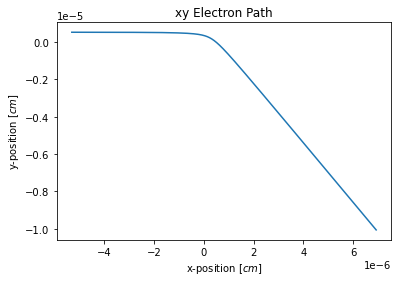

In [9]:
#multiply by the length scale to get back into standard xy units (instead of per bohr radius)
#graph the x and y positions  
plt.plot(l0*ans0.y[0],l0*ans0.y[2])    
plt.xlabel(f"x-position $[{l0.unit}]$")
plt.ylabel(f"y-position $[{l0.unit}]$")
plt.title('xy Electron Path')
plt.show()

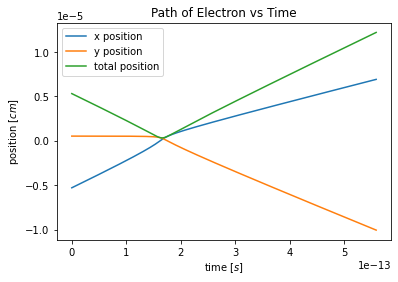

In [10]:
#multiply by the length scale to get back into standard xy units (instead of per bohr radius)
#graph the positions vs time 

#plot x vs time
plt.plot(t0*ans0.t,l0*ans0.y[0], label= 'x position')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")

#plot y vs time
plt.plot(t0*ans0.t,l0*ans0.y[2], label= 'y position')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")


#plot total position vs time
total_pos = np.sqrt((l0*ans0.y[2])**2+(l0*ans0.y[0])**2)
plt.plot(t0*ans0.t,total_pos, label= 'total position')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")

plt.title('Path of Electron vs Time')
plt.legend(loc='best')
plt.show()

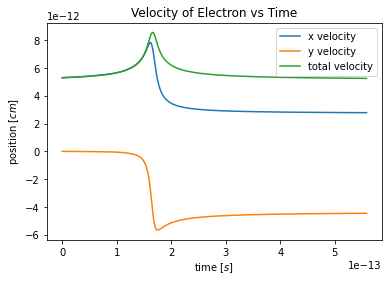

In [11]:
#multiply by the length scale to get back into standard xy units (instead of per bohr radius)
#graph the positions vs time 

#plot vx vs time
plt.plot(t0*ans0.t,l0*ans0.y[1], label= 'x velocity')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")

#plot vy vs time
plt.plot(t0*ans0.t,l0*ans0.y[3], label= 'y velocity')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")


#plot total velocity vs time
total_vel = np.sqrt((l0*ans0.y[1])**2+(l0*ans0.y[3])**2)
plt.plot(t0*ans0.t,total_vel, label= 'total velocity')    
plt.xlabel(f"time $[{t0.unit}]$")
plt.ylabel(f"position $[{l0.unit}]$")

plt.title('Velocity of Electron vs Time')
plt.legend(loc='best')
plt.show()

In [12]:
#define differential equations to solve for ax and ay
#x: x-position
#y: y-position
#Z: given constant

#defines equation for ax
def acc_x(x,y,Z):
    acc = acc0 * (-Z*(alpha**2)*x/(x**2+y**2)**(3/2))
    return acc
#defines equation for ay
def acc_y(x,y,Z):
    acc = acc0 * (-Z*(alpha**2)*y/(x**2+y**2)**(3/2))
    return acc

In [13]:
#compute total acceleration by combining ax and ay terms

x_acc = acc_x(ans0.y[0], ans0.y[2],1)
y_acc = acc_y(ans0.y[0], ans0.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)

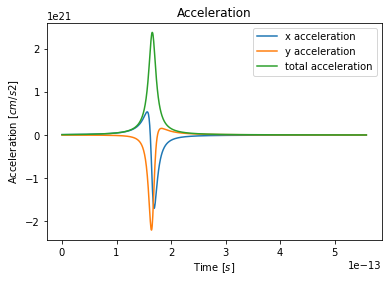

In [14]:
#plots time vs ax
plt.plot(t0*ans0.t, x_acc, label = 'x acceleration')   #multiply by t0 to get time in standard units
plt.xlabel(f"Time $[{t0.unit}]$")

#plots time vs vy
plt.plot(t0*ans0.t, y_acc, label = 'y acceleration')      #multiply by t0 to get time in standard units
plt.xlabel(f"Time $[{t0.unit}]$")


#plot total acceleration
plt.plot(t0*ans0.t,acc_total, label = 'total acceleration')
plt.xlabel(f"Time $[{t0.unit}]$")
plt.ylabel(f"Acceleration $[{acc0.unit}]$")
plt.title('Acceleration')
plt.legend(loc='best')
plt.show()

In [15]:
T=1/t0*ans0.t[-1] #extra term to account for fft function instead of integration

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
power = (fft.fft(arr))
N =len(arr)       
aFT = T*power / len(power)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]

#compute frequencies from the fourier transform
freq = fft.fftfreq(N,T)[:N//2]



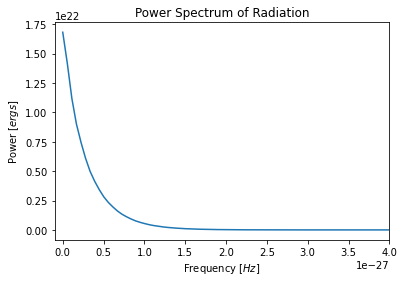

In [16]:
#plot Power Spectrum
plt.plot(freq,ps)
plt.xlabel(f"Frequency $[{'Hz'}]$")
plt.ylabel(f"Power $[{'ergs'}]$")
plt.title('Power Spectrum of Radiation')
#plt.xlim([0, 0.5*10**(-26)])
plt.xlim([-(.01*10**(-26)), 0.4*10**(-26)])
plt.show()


Now, I will compute the graphs above for 5 different sets of initial conditions using the same proccess as above.

In [17]:
# y0= [-1000,1e-3,100,0] 

def multi_ans():
    y1= [-1000,.5e-3,150,0]      #define initial conditions in the form [x,vx,y,vy]
    y2= [-1000,5e-3,50,0]
    y3= [-1000,2e-3,75,0]
    y4= [-1000,10e-3,175,0]
    y5= [-1000,3e-3,25,0]
    
    t_eval = np.linspace(0, 10**(6.5), 1000)
    t_span = [0,1*10**(6.5)]
    ans1=solve_ivp(path_e, t_span=t_span,y0=y1,args = (1,), t_eval=t_eval)
    ans2=solve_ivp(path_e, t_span=t_span,y0=y2,args = (1,), t_eval=t_eval)
    ans3=solve_ivp(path_e, t_span=t_span,y0=y3,args = (1,), t_eval=t_eval)
    ans4=solve_ivp(path_e, t_span=t_span,y0=y4,args = (1,), t_eval=t_eval)
    ans5=solve_ivp(path_e, t_span=t_span,y0=y5,args = (1,), t_eval=t_eval)
    
    return ans1, ans2, ans3, ans4, ans5

In [18]:
ans1, ans2, ans3, ans4, ans5 = multi_ans()

(-1.0000000000000001e-28, 4e-27)

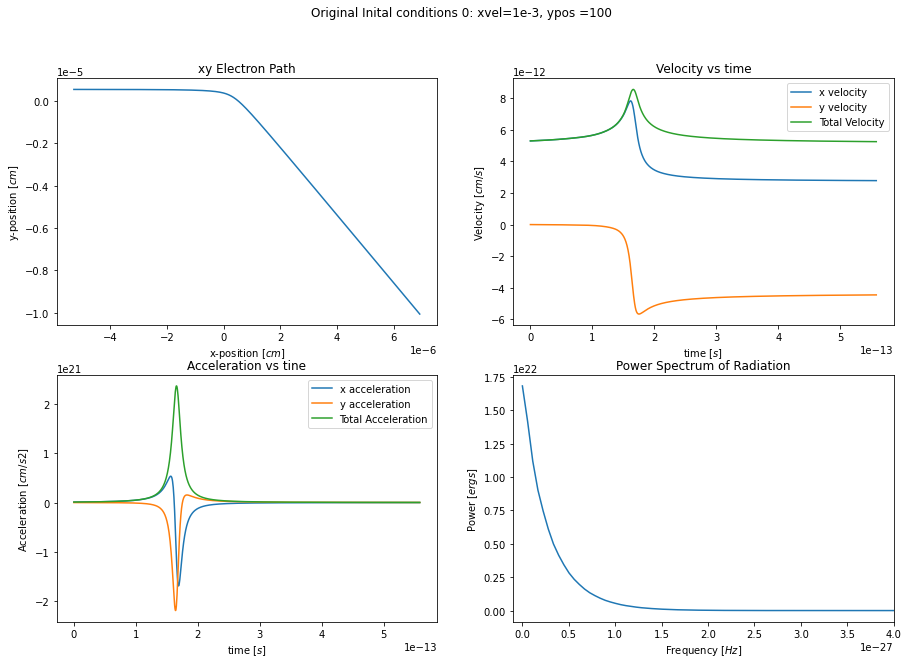

In [19]:
#repeat inital graphs

#y0=[-1000,1e-3,100,0]
#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Original Inital conditions 0: xvel=1e-3, ypos =100')
ax[0,0].plot(l0*ans0.y[0],l0*ans0.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')

#velocity
ax[0,1].plot(t0*ans0.t,l0*ans0.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans0.t,l0*ans0.y[3], label = 'y velocity')

vel_total=np.sqrt((l0*ans0.y[1])**2+(l0*ans0.y[3])**2)
ax[0,1].plot(t0*ans0.t,vel_total, label = 'Total Velocity')

ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')

#acceleration

x_acc = acc_x(ans0.y[0], ans0.y[2],1)
y_acc = acc_y(ans0.y[0], ans0.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans0.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans0.t,y_acc, label = 'y acceleration')


ax[1,0].plot(t0*ans0.t,acc_total, label = 'Total Acceleration')

ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs tine')

#calculate power spectrum

T=1/t0*ans0.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]
#compute frequencies from the fourier transform

timestep = 10
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')
#plt.xlim([0, 0.5*10**(-26)])
ax[1,1].set_xlim([-(.01*10**(-26)), 0.4*10**(-26)])


(-5e-29, 5e-27)

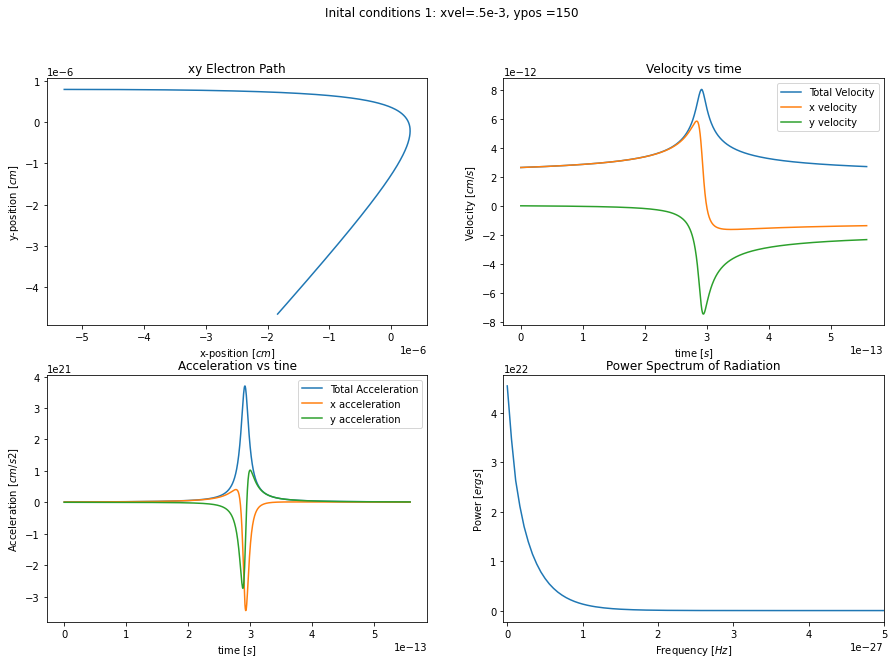

In [20]:
#y1= [-1000,.5e-3,150,0]
#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Inital conditions 1: xvel=.5e-3, ypos =150')
ax[0,0].plot(l0*ans1.y[0],l0*ans1.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')

#velocity
vel_total=np.sqrt((l0*ans1.y[1])**2+(l0*ans1.y[3])**2)
ax[0,1].plot(t0*ans1.t,vel_total, label = 'Total Velocity')
ax[0,1].plot(t0*ans1.t,l0*ans1.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans1.t,l0*ans1.y[3], label = 'y velocity')

ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')

#acceleration

x_acc = acc_x(ans1.y[0], ans1.y[2],1)
y_acc = acc_y(ans1.y[0], ans1.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans1.t,acc_total, label = 'Total Acceleration')
ax[1,0].plot(t0*ans1.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans1.t,y_acc, label = 'y acceleration')


ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs tine')

#calculate power spectrum

T=1/t0*ans1.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]
#compute frequencies from the fourier transform

timestep = 10
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')
ax[1,1].set_xlim([-(.5*10**(-28)), 0.5*10**(-26)])

Text(0.5, 1.0, 'Power Spectrum of Radiation')

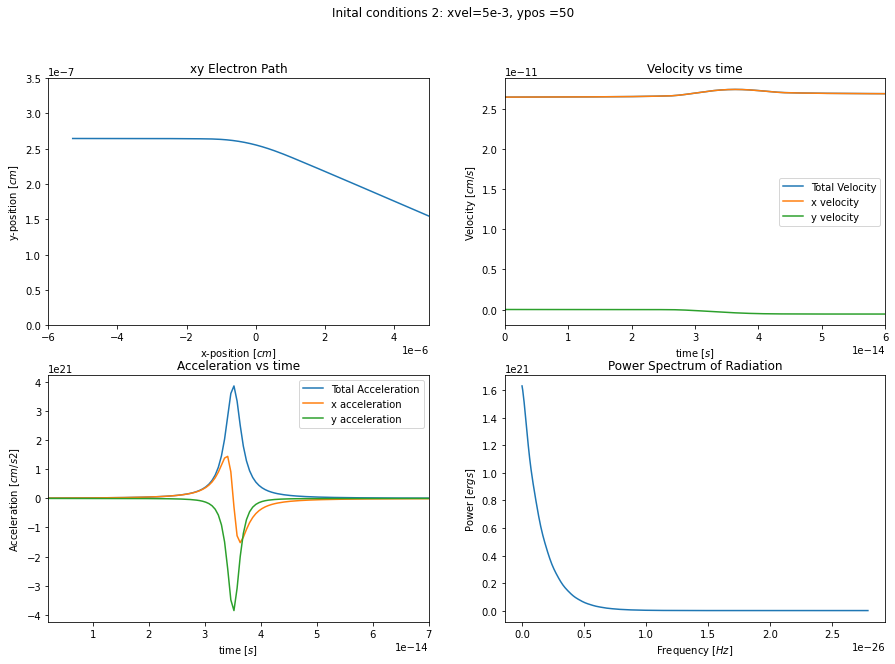

In [21]:
#y2= [-1000,5e-3,50,0]

#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Inital conditions 2: xvel=5e-3, ypos =50')
ax[0,0].plot(l0*ans2.y[0],l0*ans2.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')
ax[0,0].set_xlim([-(.6)*10**(-5), (.5*10**(-5))])
ax[0,0].set_ylim([0, (.35*10**(-6))])

#velocity
vel_total=np.sqrt((l0*ans2.y[1])**2+(l0*ans2.y[3])**2)
ax[0,1].plot(t0*ans2.t,vel_total, label = 'Total Velocity')
ax[0,1].plot(t0*ans2.t,l0*ans2.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans2.t,l0*ans2.y[3], label = 'y velocity')


ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')
ax[0,1].set_xlim([-(.01*10**(-26)), 0.6*10**(-13)])

#acceleration

x_acc = acc_x(ans2.y[0], ans2.y[2],1)
y_acc = acc_y(ans2.y[0], ans2.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans2.t,acc_total, label = 'Total Acceleration')
ax[1,0].plot(t0*ans2.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans2.t,y_acc, label = 'y acceleration')


ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs time')
ax[1,0].set_xlim([(.02*10**(-13)), 0.7*10**(-13)])

#calculate power spectrum

T=1/t0*ans2.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]
#compute frequencies from the fourier transform

timestep = 10
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')
#plt.xlim([0, 0.5*10**(-26)])
#ax[1,1].set_xlim([-(.01*10**(-26)), 0.4*10**(-26)])

Text(0.5, 1.0, 'Power Spectrum of Radiation')

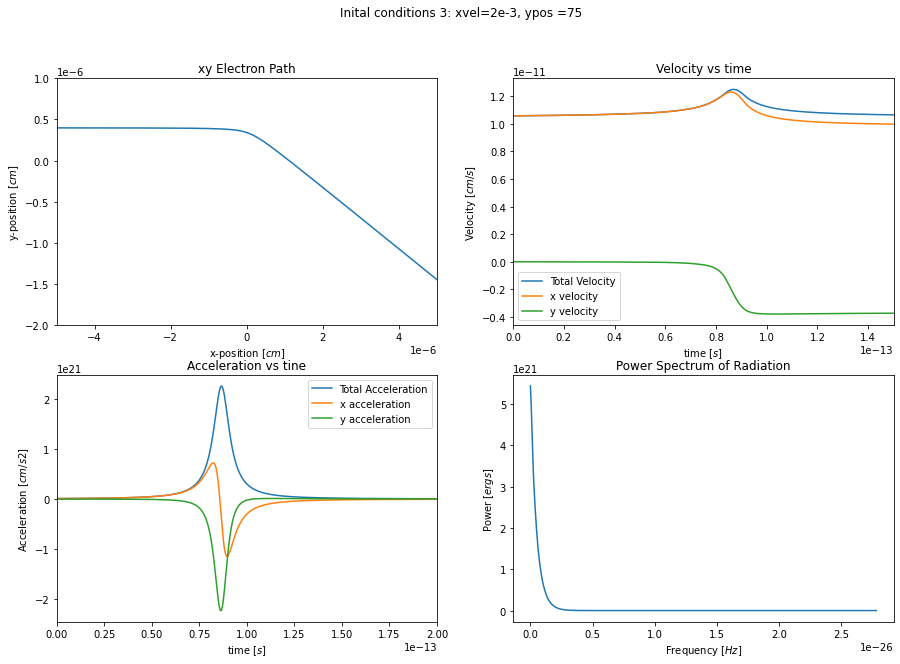

In [22]:
#y3= [-1000,2e-3,75,0]

#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Inital conditions 3: xvel=2e-3, ypos =75')
ax[0,0].plot(l0*ans3.y[0],l0*ans3.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')
ax[0,0].set_ylim([-(.2)*10**(-5), (.1)*10**(-5)])
ax[0,0].set_xlim([-(.5)*10**(-5), (.5)*10**(-5)])


#velocity
vel_total=np.sqrt((l0*ans3.y[1])**2+(l0*ans3.y[3])**2)
ax[0,1].plot(t0*ans3.t,vel_total, label = 'Total Velocity')
ax[0,1].plot(t0*ans3.t,l0*ans3.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans3.t,l0*ans3.y[3], label = 'y velocity')


ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')
ax[0,1].set_xlim([0, (1.5)*10**(-13)])

#acceleration

x_acc = acc_x(ans3.y[0], ans3.y[2],1)
y_acc = acc_y(ans3.y[0], ans3.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans3.t,acc_total, label = 'Total Acceleration')
ax[1,0].plot(t0*ans3.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans3.t,y_acc, label = 'y acceleration')


ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs tine')
ax[1,0].set_xlim([0, 2*10**(-13)])

#calculate power spectrum

T=1/t0*ans3.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]
#compute frequencies from the fourier transform

timestep = 10
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')
#ax[1,1].set_xlim([-(.5*10**(-28)), 0.2*10**(-27)])

Text(0.5, 1.0, 'Power Spectrum of Radiation')

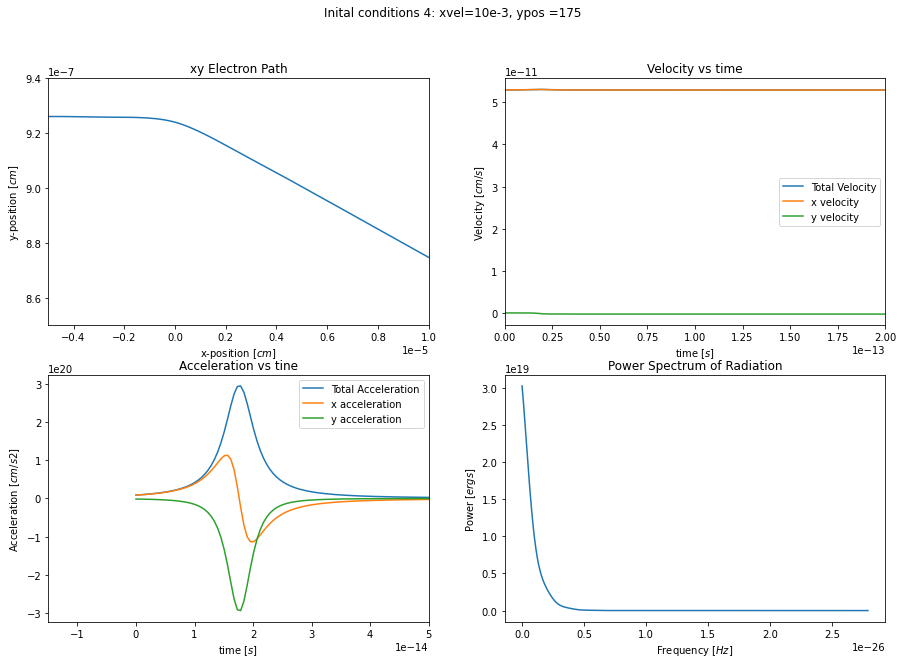

In [23]:
#y4= [-1000,10e-3,175,0]
    
#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Inital conditions 4: xvel=10e-3, ypos =175')
ax[0,0].plot(l0*ans4.y[0],l0*ans4.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')
ax[0,0].set_ylim([(8.5)*10**(-7), (9.4)*10**(-7)])
ax[0,0].set_xlim([-.000005, .00001])

#velocity
vel_total=np.sqrt((l0*ans4.y[1])**2+(l0*ans4.y[3])**2)
ax[0,1].plot(t0*ans4.t,vel_total, label = 'Total Velocity')
ax[0,1].plot(t0*ans4.t,l0*ans4.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans4.t,l0*ans4.y[3], label = 'y velocity')


ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')
ax[0,1].set_xlim([0, (2*10**(-13))])

#acceleration

x_acc = acc_x(ans4.y[0], ans4.y[2],1)
y_acc = acc_y(ans4.y[0], ans4.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans4.t,acc_total, label = 'Total Acceleration')
ax[1,0].plot(t0*ans4.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans4.t,y_acc, label = 'y acceleration')


ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs tine')
ax[1,0].set_xlim([(-.15*10**(-13)), (.5*10**(-13))])

#calculate power spectrum

T=1/t0*ans4.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]

#compute frequencies from the fourier transform
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')

Text(0.5, 1.0, 'Power Spectrum of Radiation')

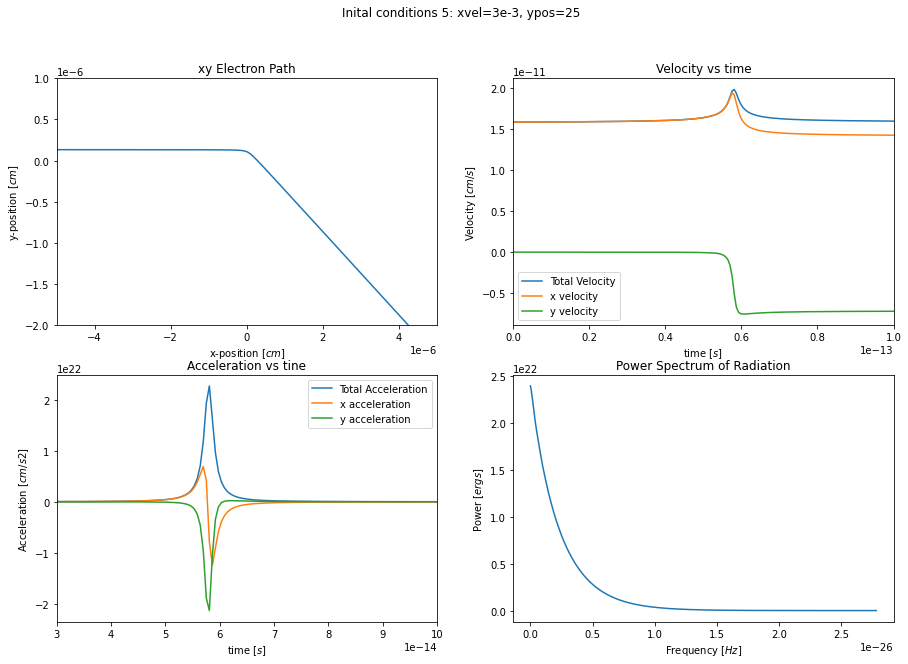

In [24]:
#y5= [-1000,3e-3,25,0]
#positon 
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Inital conditions 5: xvel=3e-3, ypos=25')
ax[0,0].plot(l0*ans5.y[0],l0*ans5.y[2])
ax[0,0].set_xlabel(f"x-position $[{l0.unit}]$")
ax[0,0].set_ylabel(f"y-position $[{l0.unit}]$")
ax[0,0].set_title('xy Electron Path')
ax[0,0].set_ylim([-(.2)*10**(-5), (.1)*10**(-5)])
ax[0,0].set_xlim([-(.5)*10**(-5), (.5)*10**(-5)])

#velocity
vel_total=np.sqrt((l0*ans5.y[1])**2+(l0*ans5.y[3])**2)
ax[0,1].plot(t0*ans5.t,vel_total, label = 'Total Velocity')
ax[0,1].plot(t0*ans5.t,l0*ans5.y[1], label = 'x velocity')
ax[0,1].plot(t0*ans5.t,l0*ans5.y[3], label = 'y velocity')


ax[0,1].legend(loc='best') 
ax[0,1].set_xlabel(f"time $[{t0.unit}]$")
ax[0,1].set_ylabel(f"Velocity $[{v0.unit}]$")
ax[0,1].set_title('Velocity vs time')
ax[0,1].set_xlim([0, (10**(-13))])

#acceleration

x_acc = acc_x(ans5.y[0], ans5.y[2],1)
y_acc = acc_y(ans5.y[0], ans5.y[2],1)
      
acc_total=np.sqrt(x_acc**2+(y_acc)**2)
ax[1,0].plot(t0*ans5.t,acc_total, label = 'Total Acceleration')
ax[1,0].plot(t0*ans5.t,x_acc, label = 'x acceleration')
ax[1,0].plot(t0*ans5.t,y_acc, label = 'y acceleration')


ax[1,0].legend(loc='best') 
ax[1,0].set_xlabel(f"time $[{t0.unit}]$")
ax[1,0].set_ylabel(f"Acceleration $[{acc0.unit}]$")
ax[1,0].set_title('Acceleration vs tine')
ax[1,0].set_xlim([.3*10**(-13), (1*10**(-13))])

#calculate power spectrum

T=1/t0*ans5.t[-1]

#compute fourier transform of the acceleration
arr = np.asarray(acc_total)
radiaiton = (fft.fft(arr))
N =int(1000) 
aFT = T*radiaiton / len(radiaiton)
ps = (((8*np.pi*(e.gauss.value)**2)/(3*c**3*T))*np.abs(aFT)**2)[:N//2]

#compute frequencies from the fourier transform
freq = fft.fftfreq(N,T)[:N//2]

#plot Power Spectrum
ax[1,1].plot(freq,ps)
ax[1,1].set_xlabel(f"Frequency $[{'Hz'}]$")
ax[1,1].set_ylabel(f"Power $[{'ergs'}]$")
ax[1,1].set_title('Power Spectrum of Radiation')
